In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings; warnings.simplefilter('ignore')
import sys
sys.path.insert(0, '/Users/jsmonzon/Research/SatGen/mcmc/src/')
import jsm_halopull
import jsm_SHMR
import jsm_mcmc
import jsm_stats
import jsm_models

In [3]:
plt.style.use('bmh')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['axes.labelsize'] = 15
plt.rc('legend',fontsize=15) # using a size in points
import pygtc


In [4]:
plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

### first the alpha permutations

In [5]:
alpha1 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

alpha2 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_2/chain.h5", Nstack=500, Nburn=500, Nthin=25)

alpha3 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_3/chain.h5", Nstack=500, Nburn=500, Nthin=25)

alpha4 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_4/chain.h5", Nstack=500, Nburn=500, Nthin=25)

alpha5 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/alpha/mock_5/chain.h5", Nstack=500, Nburn=500, Nthin=25)

In [6]:
save_file = "../../../paper_1/figures/alpha_perm.pdf"

model_color = "darkcyan"

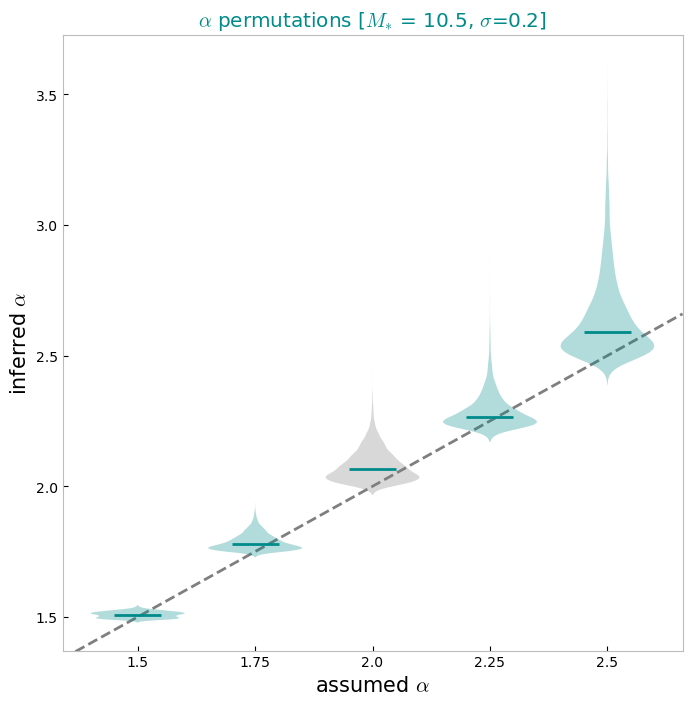

In [7]:
alpha_permutations = [1.5, 1.75, 2.0, 2.25, 2.5]

data = [alpha2.thin[:,1], alpha3.thin[:,1],  alpha1.thin[:,1], alpha4.thin[:,1], alpha5.thin[:,1]]

# Create a violin plot
plt.figure(figsize=(8, 8))
plt.title("$\\alpha$ permutations [$M_{*}$ = 10.5, $\\sigma$=0.2]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=alpha_permutations, widths=0.2, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 2:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)

plt.xticks(alpha_permutations, ['1.5', '1.75', '2.0', '2.25', '2.5'])
plt.ylabel('inferred $\\alpha$', fontsize=15)
plt.xlabel("assumed $\\alpha$", fontsize=15)

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='black', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.savefig(save_file, bbox_inches='tight')

plt.show()


### now sigma

In [8]:
sigma1 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

sigma2 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_2/chain.h5", Nstack=500, Nburn=500, Nthin=25)

sigma3 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_3/chain.h5", Nstack=500, Nburn=500, Nthin=25)

sigma4 = jsm_mcmc.single_chain("../../../data/paper/mock_permutations_a2/model_A/sigma/mock_4/chain.h5", Nstack=500, Nburn=500, Nthin=25)

In [9]:
save_file = "../../../paper_1/figures/sigma_perm.pdf"
model_color = "darkcyan"

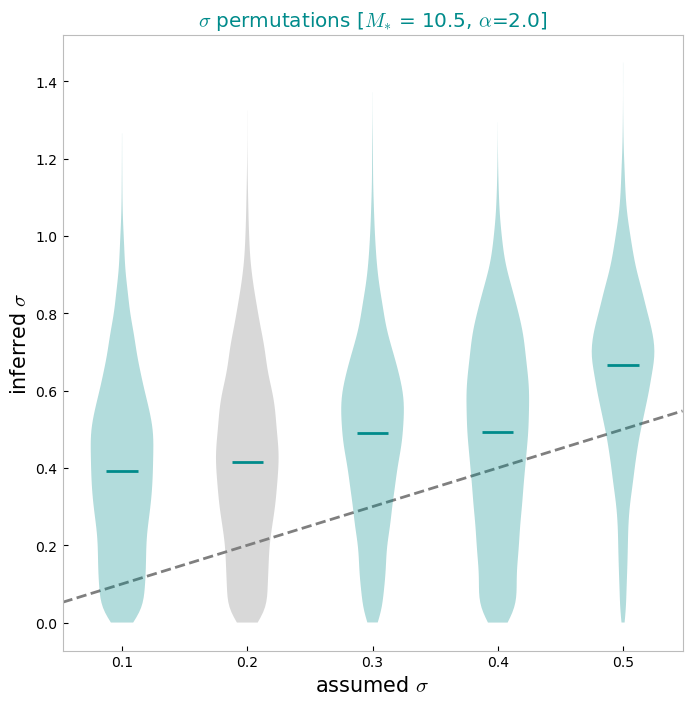

In [10]:
sigma_permutations = [0.1, 0.2, 0.3, 0.4, 0.5]

data = [sigma1.thin[:,2], alpha1.thin[:,2], sigma2.thin[:,2], sigma3.thin[:,2], sigma4.thin[:,2]]

# Create a violin plot with custom x values and colors
plt.figure(figsize=(8, 8))
plt.title("$\\sigma$ permutations [$M_{*}$ = 10.5, $\\alpha$=2.0]", color=model_color)
violins = plt.violinplot(data, showmeans=False, showmedians=True, positions=sigma_permutations, widths=0.05, showextrema=False)

for i, violin in enumerate(violins['bodies']):
    if i == 1:
        violin.set_facecolor("grey")
    else:
        violin.set_facecolor(model_color)

violins['cmedians'].set_color(model_color)

plt.xticks(sigma_permutations, ['0.1', '0.2', '0.3', '0.4', '0.5'])
plt.ylabel('inferred $\\sigma$', fontsize=15)
plt.xlabel("assumed $\\sigma$", fontsize=15)


xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', scalex=False, scaley=False, zorder=0, alpha=0.5)

#plt.savefig(save_file, bbox_inches='tight')

plt.show()


In [11]:
data = [alpha2.thin[:,1:3], alpha3.thin[:,1:3],  alpha1.thin[:,1:3], alpha4.thin[:,1:3], alpha5.thin[:,1:3]]

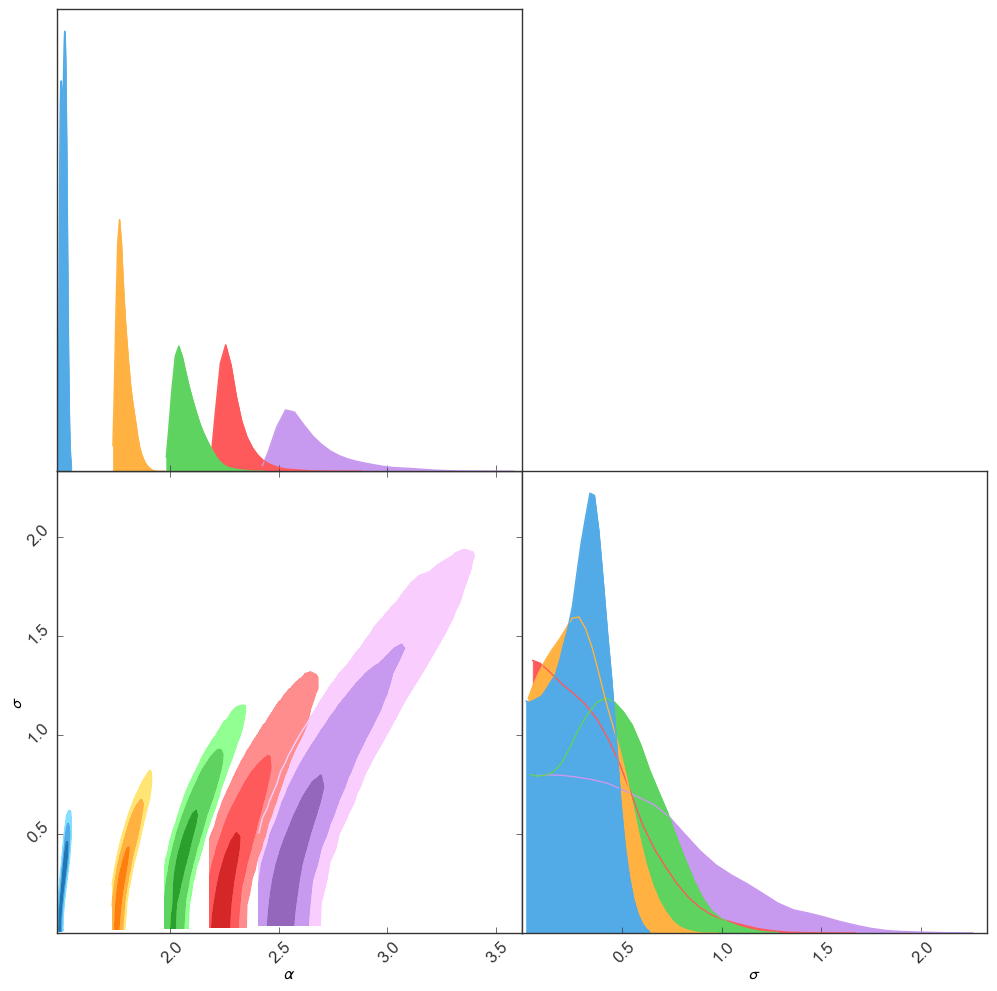

In [12]:
Ndim = 3
GTC = pygtc.plotGTC(chains=data,
                paramNames = plabels[1:3],
                nContourLevels=3,
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=True,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})

In [13]:
alpha1_r = jsm_mcmc.single_chain("../../../data/correlation_test/alpha/mock_1/chain.h5", Nstack=500, Nburn=500, Nthin=25)

data = [alpha1.thin[:,1:3], alpha1_r.thin[:,1:3]]

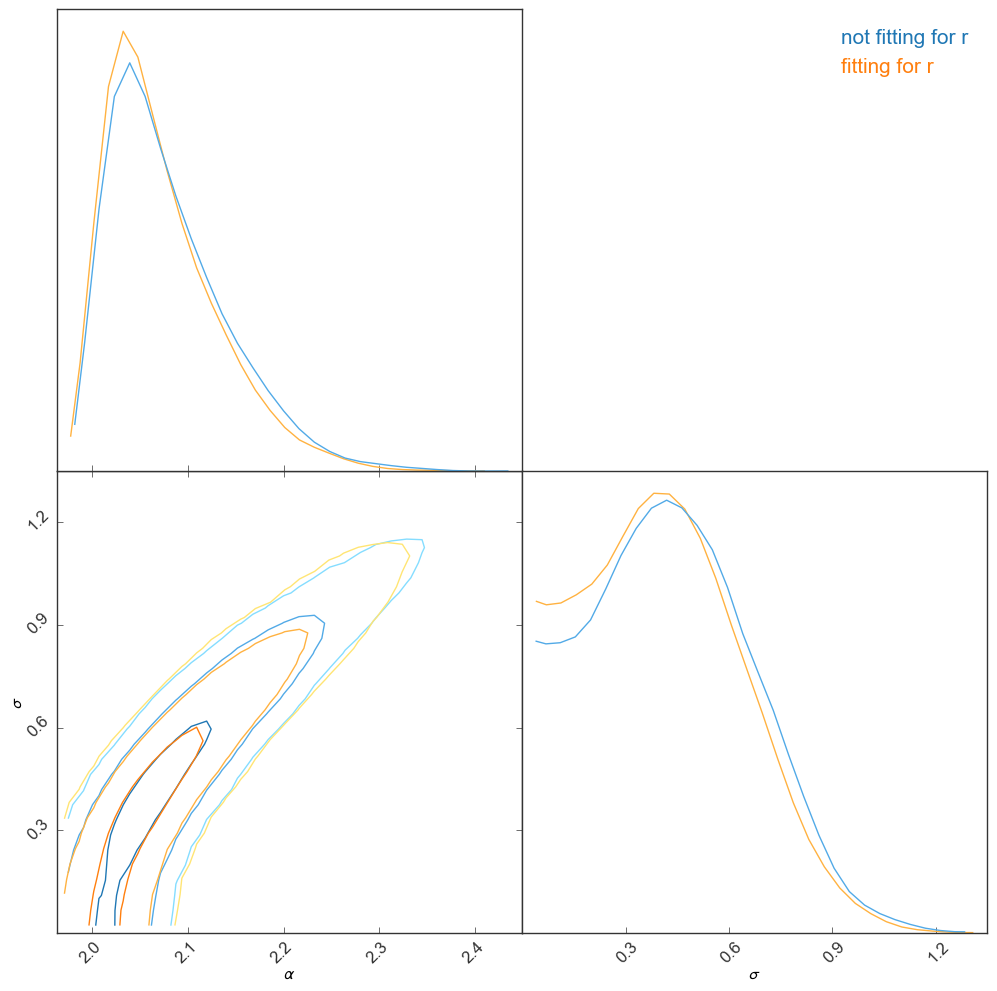

In [16]:
GTC = pygtc.plotGTC(chains=data,
                paramNames = plabels[1:3],
                nContourLevels=3,
                chainLabels=["not fitting for r", "fitting for r"],
                figureSize=int(8*Ndim/2),
                smoothingKernel=1,
                filledPlots=False,
                customTickFont={'family':'Arial', 'size':12},
                customLegendFont={'family':'Arial', 'size':15},
                customLabelFont={'family':'Arial', 'size':12})

In [24]:
host_halo_PDF = np.load("../../../SatGen/etc/halo_mass_PDF_full.npy")
samples = np.random.choice(host_halo_PDF[:,0], size=10000, p=host_halo_PDF[:,1]/np.sum(host_halo_PDF[:,1])) 

(array([  11.,   62.,  190.,  415.,  738.,  822., 1162., 1253., 1200.,
         870.,  911.,  677.,  535.,  406.,  218.,  191.,  125.,   93.,
          54.,   28.,   13.,    8.,   10.,    4.,    4.]),
 array([11.7290974 , 11.82541843, 11.92173946, 12.01806048, 12.11438151,
        12.21070254, 12.30702357, 12.4033446 , 12.49966562, 12.59598665,
        12.69230768, 12.78862871, 12.88494974, 12.98127076, 13.07759179,
        13.17391282, 13.27023385, 13.36655488, 13.4628759 , 13.55919693,
        13.65551796, 13.75183899, 13.84816002, 13.94448104, 14.04080207,
        14.1371231 ]),
 <BarContainer object of 25 artists>)

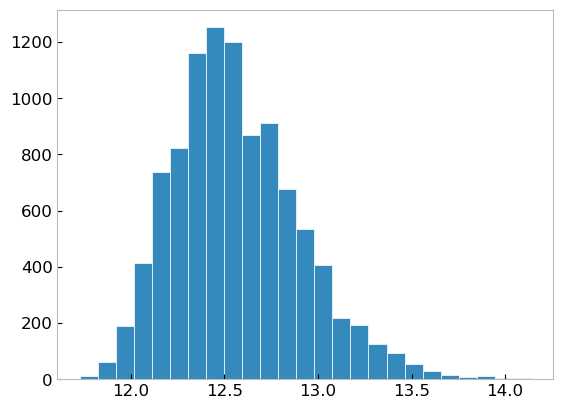

In [26]:
plt.hist(samples, bins=25, edgecolor="white")

In [4]:
test = jsm_halopull.MassMat("../../../data/cross_host/meta_data_psi3/")

In [12]:
np.sum(np.log10(test.Mhosts) == 12.4715719)

282

(array([9.000e+00, 2.900e+01, 1.370e+02, 3.060e+02, 6.150e+02, 9.150e+02,
        1.361e+03, 1.044e+03, 1.218e+03, 1.064e+03, 8.350e+02, 7.550e+02,
        6.390e+02, 3.670e+02, 2.130e+02, 2.220e+02, 1.070e+02, 7.800e+01,
        4.100e+01, 2.100e+01, 1.200e+01, 4.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00]),
 array([11.6889629 , 11.78929738, 11.88963185, 11.98996633, 12.0903008 ,
        12.19063528, 12.29096976, 12.39130423, 12.49163871, 12.59197318,
        12.69230766, 12.79264214, 12.89297661, 12.99331109, 13.09364556,
        13.19398004, 13.29431452, 13.39464899, 13.49498347, 13.59531794,
        13.69565242, 13.7959869 , 13.89632137, 13.99665585, 14.09699032,
        14.1973248 ]),
 <BarContainer object of 25 artists>)

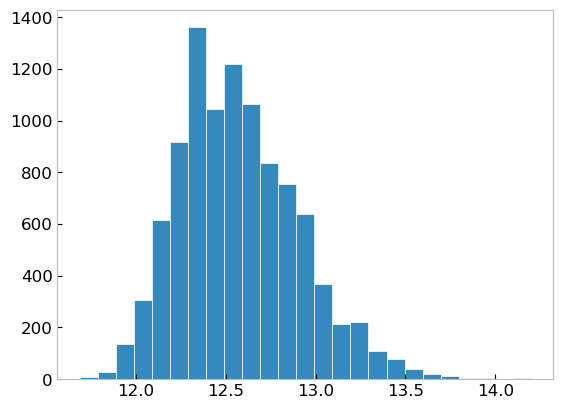

In [8]:
plt.hist(np.log10(test.Mhosts), bins=25, edgecolor="white")